Accuracy: 1.00


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6804\1846623649.py:58: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


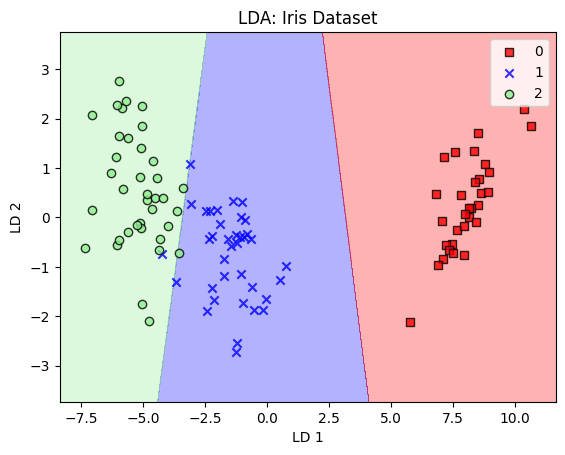

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for LDA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Apply LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

# Train a classifier (e.g., Logistic Regression) on the transformed data
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_lda)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision regions
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolor='black')

# Plot decision regions
plot_decision_regions(X_train_lda, y_train, classifier=clf)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='upper right')
plt.title('LDA: Iris Dataset')
plt.show()


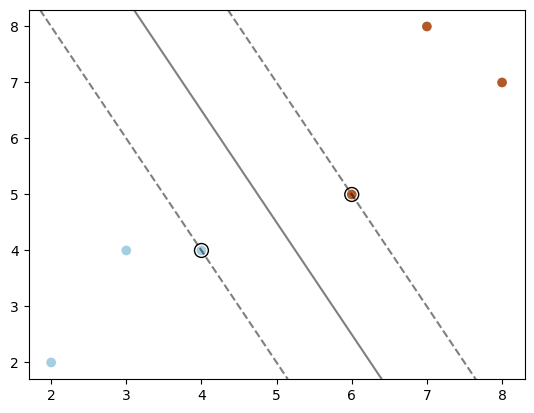

In [1]:
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np

# Example Data
X = np.array([[3, 4], [2, 2], [4, 4], [7, 8], [6, 5], [8, 7]])
y = np.array([-1, -1, -1, 1, 1, 1])

# Create SVM model with a linear kernel
clf = svm.SVC(kernel='linear', C=1e10)  # Large C for hard-margin SVM

# Fit the model
clf.fit(X, y)

# Get the weight vector and bias term
w = clf.coef_[0]
b = clf.intercept_[0]

# Plotting the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()


Accuracy of the original tree: 1.00
Accuracy of the pruned tree: 1.00


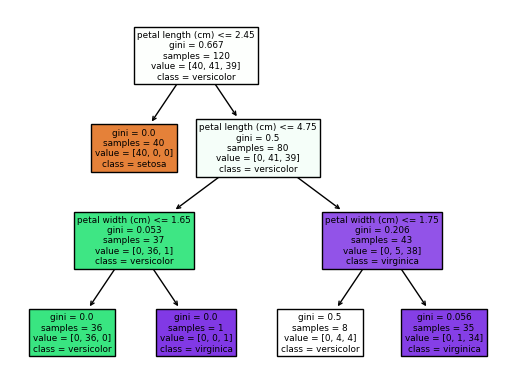

In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn import tree

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Visualize the decision tree (optional, requires Graphviz)
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

# Prune the decision tree (optional)
pruned_tree = DecisionTreeClassifier(ccp_alpha=0.015, random_state=42)
pruned_tree.fit(X_train, y_train)

# Visualize the pruned decision tree
tree.plot_tree(pruned_tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_pruned = pruned_tree.predict(X_test)

# Evaluate the model accuracy
accuracy = sum(y_pred == y_test) / len(y_test)
accuracy_pruned = sum(y_pred_pruned == y_test) / len(y_test)

print(f"Accuracy of the original tree: {accuracy:.2f}")
print(f"Accuracy of the pruned tree: {accuracy_pruned:.2f}")


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



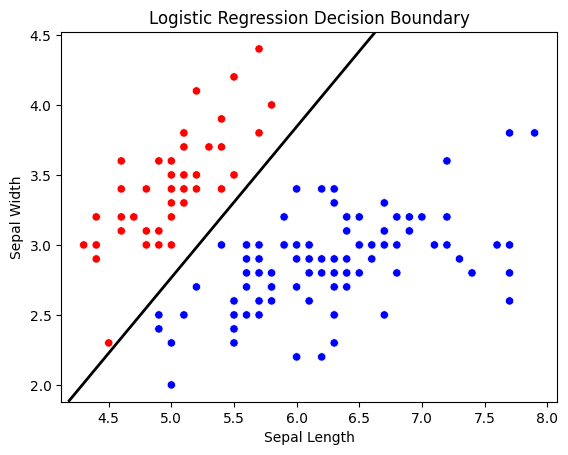

In [4]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Consider only two features for binary classification
X = iris.data[:, :2]
y = (iris.target == 0).astype(int)  # 1 if setosa, 0 otherwise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot decision boundary
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette={0: 'blue', 1: 'red'}, marker='o', legend=False)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Logistic Regression Decision Boundary")
plt.show()


In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Initialize a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Initialize Leave-One-Out cross-validator
loo = LeaveOneOut()

# Perform Leave-One-Out cross-validation
predictions = []
true_labels = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the KNN classifier
    knn.fit(X_train, y_train)

    # Make predictions on the test sample
    y_pred = knn.predict(X_test)

    # Store predictions and true labels
    predictions.append(y_pred[0])
    true_labels.append(y_test[0])

# Compute accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f'Leave-One-Out Cross-Validation Accuracy: {accuracy:.2f}')


Leave-One-Out Cross-Validation Accuracy: 0.96


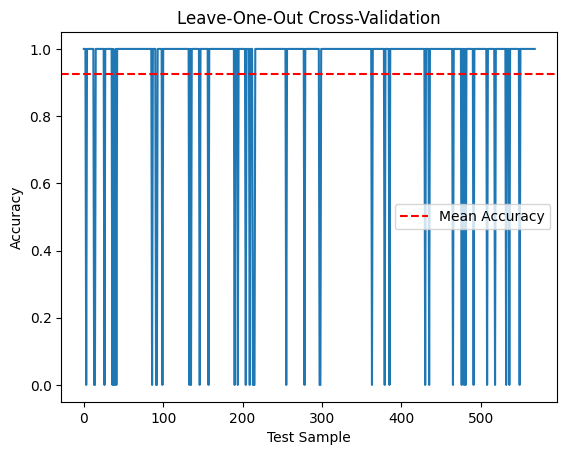

Mean Accuracy: 0.93


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Initialize a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Initialize Leave-One-Out cross-validator
loo = LeaveOneOut()

# Perform Leave-One-Out cross-validation
accuracies = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the KNN classifier
    knn.fit(X_train, y_train)

    # Make predictions on the test sample
    y_pred = knn.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Compute mean accuracy
mean_accuracy = np.mean(accuracies)

# Plot the accuracies
plt.plot(range(len(accuracies)), accuracies)
plt.xlabel('Test Sample')
plt.ylabel('Accuracy')
plt.title('Leave-One-Out Cross-Validation')
plt.axhline(y=mean_accuracy, color='r', linestyle='--', label='Mean Accuracy')
plt.legend()
plt.show()

# Print the mean accuracy
print(f'Mean Accuracy: {mean_accuracy:.2f}')


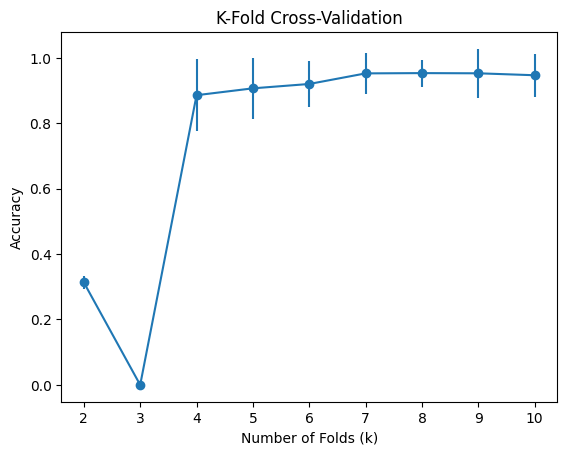

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Initialize a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Perform k-fold cross-validation
k_values = range(2, 11)
mean_scores = []
std_scores = []

for k in k_values:
    kf = KFold(n_splits=k)
    scores = cross_val_score(knn, X, y, cv=kf)
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

# Plot the mean and standard deviation of the scores
plt.errorbar(k_values, mean_scores, yerr=std_scores, fmt='-o')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross-Validation')
plt.show()


In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network architecture
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/50
4/4 [==============================] - 1s 6ms/step - loss: 1.1836 - accuracy: 0.3167
Epoch 2/50
4/4 [==============================] - 0s 6ms/step - loss: 1.1540 - accuracy: 0.3167
Epoch 3/50
4/4 [==============================] - 0s 6ms/step - loss: 1.1275 - accuracy: 0.3167
Epoch 4/50
4/4 [==============================] - 0s 7ms/step - loss: 1.1007 - accuracy: 0.3167
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0748 - accuracy: 0.3333
Epoch 6/50
4/4 [==============================] - 0s 6ms/step - loss: 1.0500 - accuracy: 0.3417
Epoch 7/50
4/4 [==============================] - 0s 7ms/step - loss: 1.0257 - accuracy: 0.3667
Epoch 8/50
4/4 [==============================] - 0s 8ms/step - loss: 1.0026 - accuracy: 0.3750
Epoch 9/50
4/4 [==============================] - 0s 6ms/step - loss: 0.9796 - accuracy: 0.4083
Epoch 10/50
4/4 [==============================] - 0s 6ms/step - loss: 0.9575 - accuracy: 0.4333
Epoch 11/50
4/4 [======================

In [13]:
import matplotlib.pyplot as plt

# Get the training history
history = model.history.history

# Plot the training and validation loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


AttributeError: 'NoneType' object has no attribute 'history'

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
